# Object Detection without OpenCV

We are trying to find coordinates of the bug inside an image full of chickens.

### Required imports

In [1]:
#!pip install opencv-python
#!pip install stumpy
#!pip install scikit-image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import stumpy
from matplotlib.patches import Rectangle
%matplotlib inline

### Preprocessing

In [503]:
"""
There are four images with different bug locations to test the code.
Uncomment the one you want to test.
"""

# chicken = cv2.imread('Chickens_with_bug_example.png')
# chicken = cv2.imread('Chickens_1.png')
# chicken = cv2.imread('Chickens_2.png')
chicken = cv2.imread('Chickens_3.png')
chicken = cv2.cvtColor(chicken, cv2.COLOR_RGB2GRAY)

### Do not change

In [504]:
bug = cv2.imread('Bug_Final.png')
bug = cv2.cvtColor(bug, cv2.COLOR_RGB2GRAY)

In [505]:
cv2.namedWindow('chicken', cv2.WINDOW_KEEPRATIO)
cv2.imshow('chicken', chicken)
cv2.resizeWindow('chicken', 1080, 720)
cv2.waitKey(1)
time.sleep(3)
cv2.destroyAllWindows()

### Thresholding to convert the image to binary

In [506]:
chicken = cv2.adaptiveThreshold(chicken, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
bug = cv2.adaptiveThreshold(bug, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [507]:
print(f'Shape of the image: {chicken.shape}\nShape of the bug: {bug.shape}')

Shape of the image: (3472, 4911)
Shape of the bug: (363, 445)


### Normalizing

In [508]:
chicken = chicken / 255
bug = bug / 255

Converting the images to time-series.

In [509]:
## Collapsing height and sum the pixels along the width
ts_chicken = chicken.sum(axis=0)
ts_bug = bug.sum(axis=0)

assert len(ts_chicken) == 4911
assert len(ts_bug) == 445

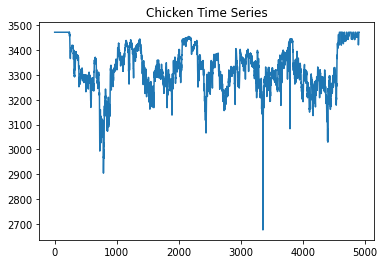

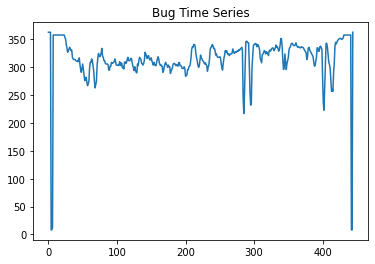

In [510]:
plt.plot(np.arange(len(ts_chicken)), ts_chicken)
plt.title('Chicken Time Series')
plt.show()
plt.plot(np.arange(len(ts_bug)), ts_bug)
plt.title('Bug Time Series')
plt.show()

#### Motif search along X axis

In [511]:
"""
To find the bug, we need to find the similarity between the two time series.
I used stumpy library to do this and its called the stumpy.stump function.
It is used for Multi-dimensional Motif Search.
"""

ma = stumpy.stump(T_A = ts_chicken.astype(np.float64), T_B = ts_bug.astype(np.float64), m = 445, ignore_trivial=False)
motif_idx_x = np.argsort(ma[:, 0])[0]
nearest_neighbor_idx_x = motif_idx_x + 445

print(f"The motif is located at index {motif_idx_x}")
print(f"The nearest neighbor is located at index {nearest_neighbor_idx_x}")

The motif is located at index 3354
The nearest neighbor is located at index 3799


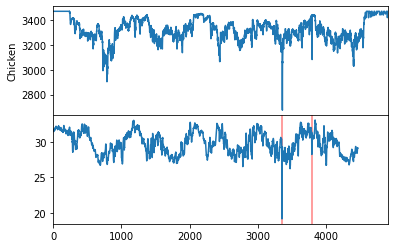

The Bug is located at index x-start = 3354  | x-end = 3799

This means the bug image is between 3354 and 3799 along the x axis.


In [512]:
"""
Plotting the result of the motif search.
"""

fig, ax = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
ax[0].plot(ts_chicken)
ax[0].set_ylabel('Chicken')
ax[0].set_xlim(0, len(ts_chicken))
rect = Rectangle((motif_idx_x, 0), 640, 40, facecolor='lightgray')
ax[0].add_patch(rect)
ax[1].axvline(motif_idx_x, color='r', alpha=0.5)
ax[1].axvline((nearest_neighbor_idx_x), color='r', alpha=0.5)
ax[1].plot(ma[:, 0])
plt.show()

print(f"The Bug is located at index x-start = {motif_idx_x}  | x-end = {nearest_neighbor_idx_x}")

print(f'\nThis means the bug image is between {motif_idx_x} and {nearest_neighbor_idx_x} along the x axis.')

### Motif search along Y axis

In [513]:
## Collapsing width and sum the pixels along the height
ts_chicken1 = chicken.sum(axis=1)
ts_bug1 = bug.sum(axis=1)

assert len(ts_chicken1) == 3472
assert len(ts_bug1) == 363

In [514]:
ma = stumpy.stump(T_A = ts_chicken1.astype(np.float64), T_B = ts_bug1.astype(np.float64), m = 363, ignore_trivial=False)
motif_idx_y = np.argsort(ma[:, 0])[0]
nearest_neighbor_idx_y = motif_idx_y + 363
print(f"The motif is located at index {motif_idx_y}")
print(f"The nearest neighbor is located at index {nearest_neighbor_idx_y}")

The motif is located at index 181
The nearest neighbor is located at index 544


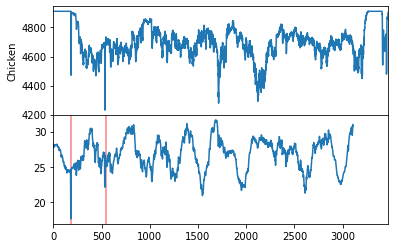

The Bug is located at index y-start = 181 | y-end = 544

This means the bug image is between 181 and 544 along the y axis.

Coordinates of the bug (x1, x2) (y1, y2) = (3354, 3799) (181, 544)


In [515]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
start = motif_idx_y - 445
ax[0].plot(ts_chicken1)
ax[0].set_ylabel('Chicken')
ax[0].set_xlim(0, len(ts_chicken1))
rect = Rectangle((motif_idx_y, 0), 640, 40, facecolor='lightgray')
ax[0].add_patch(rect)
ax[1].axvline(motif_idx_y, color='r', alpha=0.5)
ax[1].axvline((nearest_neighbor_idx_y), color='r', alpha=0.5)
ax[1].plot(ma[:, 0])
plt.show()

print(f"The Bug is located at index y-start = {motif_idx_y} | y-end = {nearest_neighbor_idx_y}")

print(f'\nThis means the bug image is between {motif_idx_y} and {nearest_neighbor_idx_y} along the y axis.')

print(f'\nCoordinates of the bug (x1, x2) (y1, y2) = ({motif_idx_x}, {nearest_neighbor_idx_x}) ({motif_idx_y}, {nearest_neighbor_idx_y})')

In [516]:
clone = chicken.copy()
cv2.namedWindow('Sliding Window', cv2.WINDOW_KEEPRATIO)
cv2.rectangle(clone, (motif_idx_x, motif_idx_y), (nearest_neighbor_idx_x, nearest_neighbor_idx_y), (0, 255, 0), 9)
cv2.imshow('Sliding Window', clone)
cv2.resizeWindow('Sliding Window', 1080, 780)
cv2.waitKey(1)
time.sleep(0.05)

In [488]:
cv2.destroyAllWindows()

Try it yourself! place the bug anywhere on the Chickens_clean.png and run the code :)